In [1]:
# import the libraries
import cobra
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import statsmodels
from scipy.stats import sem, t
from scipy import mean
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
from scipy.stats import hypergeom

In [2]:
# import FS files
samples_HC = pd.read_csv("modelCON.csv")
samples_T2D_R = pd.read_csv("modelT2D_R.csv")
samples_T2D_NR = pd.read_csv("modelT2D_NR.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_25328\954938842.py:19: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  kstat,pval=sp.stats.ks_2samp(data1,data2)


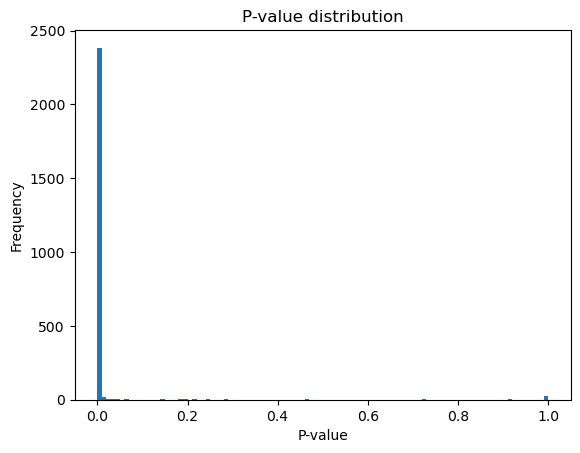

In [3]:
# differential flux analysis between control and t2d responder
def kstest(samplesUI,samplesI,file_name):

    rxns1=set(samplesUI.columns)
    rxns2=set(samplesI.columns)

    rxn_c=rxns1.intersection(rxns2)

    pvals=[]
    rxnid=[]
    fc=[]

    for rxn in rxn_c:
        data1=samplesUI[rxn].round(decimals=4)
        data2=samplesI[rxn].round(decimals=4)
        data1=data1.sample(n=1000)
        data2=data2.sample(n=1000)
        if((data1.std()!=0 and data1.mean()!=0) or (data2.std()!=0 and data2.mean()!=0)):
            kstat,pval=sp.stats.ks_2samp(data1,data2)
            foldc=(data1.mean()-data2.mean())/abs(data1.mean()+data2.mean())
            pvals.append(pval)
            rxnid.append(rxn)
            fc.append(foldc)
    data_mwu=pd.DataFrame({'Reaction':rxnid,'Pvalue':pvals})
    data_mwu=data_mwu.set_index('Reaction')
    plt.hist(data_mwu['Pvalue'],100)
    plt.xlabel('P-value')
    plt.ylabel('Frequency')
    plt.title('P-value distribution')
    reject,padj,_,_=statsmodels.stats.multitest.multipletests(data_mwu['Pvalue'],
                                                              alpha=0.05, method='fdr_bh',
                                                              is_sorted=False, returnsorted=False)
    data_mwu['Padj']=padj
    data_mwu['Reject']=reject
    data_mwu['FC']=fc
    data_sigFC=data_mwu.loc[(abs(data_mwu['FC'])>0.82) & (data_mwu['Padj']<0.05),:]
    
        
    file=file_name+"_data_sigFC.csv"
    tile=file_name+"_mwu.csv"
    data_sigFC.to_csv(file)
    data_mwu.to_csv(tile)
kstest(samples_HC,samples_T2D_R,'T2D_R')

C:\Users\DELL\AppData\Local\Temp\ipykernel_25328\3084001034.py:19: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  kstat,pval=sp.stats.ks_2samp(data1,data2)


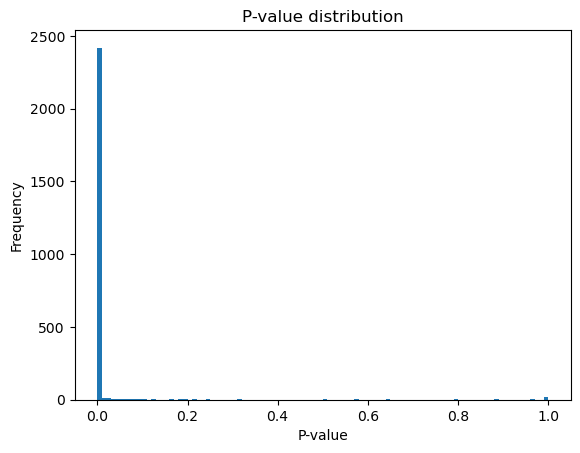

In [4]:
# differential flux analysis between control and t2d non-responder
def kstest(samplesUI,samplesI,file_name):

    rxns1=set(samplesUI.columns)
    rxns2=set(samplesI.columns)

    rxn_c=rxns1.intersection(rxns2)

    pvals=[]
    rxnid=[]
    fc=[]

    for rxn in rxn_c:
        data1=samplesUI[rxn].round(decimals=4)
        data2=samplesI[rxn].round(decimals=4)
        data1=data1.sample(n=1000)
        data2=data2.sample(n=1000)
        if((data1.std()!=0 and data1.mean()!=0) or (data2.std()!=0 and data2.mean()!=0)):
            kstat,pval=sp.stats.ks_2samp(data1,data2)
            foldc=(data1.mean()-data2.mean())/abs(data1.mean()+data2.mean())
            pvals.append(pval)
            rxnid.append(rxn)
            fc.append(foldc)
    data_mwu=pd.DataFrame({'Reaction':rxnid,'Pvalue':pvals})
    data_mwu=data_mwu.set_index('Reaction')
    plt.hist(data_mwu['Pvalue'],100)
    plt.xlabel('P-value')
    plt.ylabel('Frequency')
    plt.title('P-value distribution')
    reject,padj,_,_=statsmodels.stats.multitest.multipletests(data_mwu['Pvalue'], alpha=0.05,
                                                              method='fdr_bh', is_sorted=False,
                                                              returnsorted=False)
    data_mwu['Padj']=padj
    data_mwu['Reject']=reject
    data_mwu['FC']=fc
    data_sigFC=data_mwu.loc[(abs(data_mwu['FC'])>0.82) & (data_mwu['Padj']<0.05),:]
    
        
    file=file_name+"_data_sigFC.csv"
    tile=file_name+"_mwu.csv"
    data_sigFC.to_csv(file)
    data_mwu.to_csv(tile)
kstest(samples_HC,samples_T2D_NR,'T2D_NR')